<a href="https://colab.research.google.com/github/Chaitanya0604/Loan-Approval-Prediction-System/blob/main/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Information**

In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations, etc. The recipient (i.e. the borrower) incurs a debt, and is usually liable to pay interest on that debt until it is repaid, and also to repay the principal amount borrowed.The whole process of ascertaining if a burrower would pay back loans might be tedious hence the need to automate the procedure.Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form.

The problem at hand: The major aim of this project is to predict which of the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained with algorithms like:
1. SVM
2. Naive Bayers
3. Logistic Regression
4. Decision Tree
5. Random Forest

Below is the dataset attributes with description.

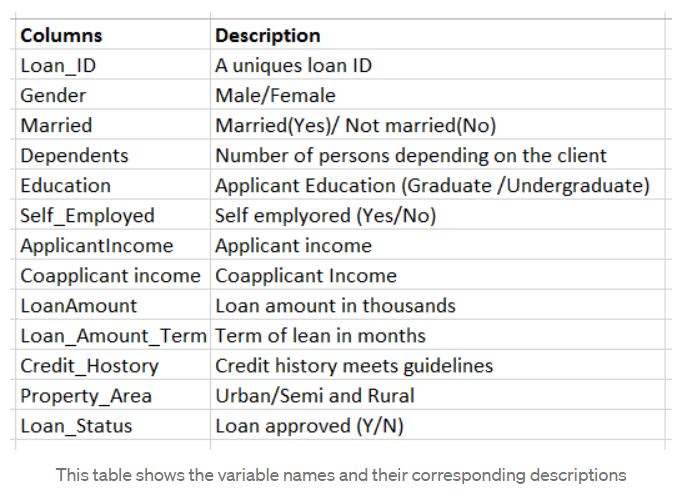


**Import Modules**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score


**Loading the dataset**

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Data Mining Project/train.csv")

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
dataset.shape

(614, 13)

Read the data and checked the shape. It has 614 rows and 13 columns. It has 12 features

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Exploratory Data Analysis: Data Visualization**

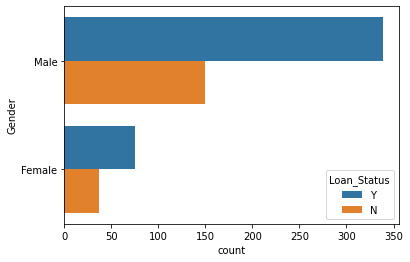

In [ ]:
sns.countplot(y='Gender', hue="Loan_Status", data=dataset)

More males are on loan than females

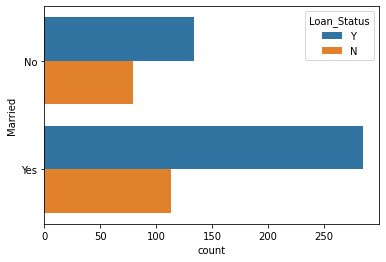

In [ ]:
sns.countplot(y='Married', hue="Loan_Status", data=dataset)

Married people collect more loan than unmarried

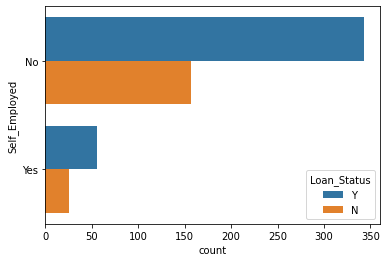

In [ ]:
sns.countplot(y='Self_Employed', hue="Loan_Status", data=dataset)

Customers who are not self-employed and probably who are salalary earners obtain more loan.

In [ ]:
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


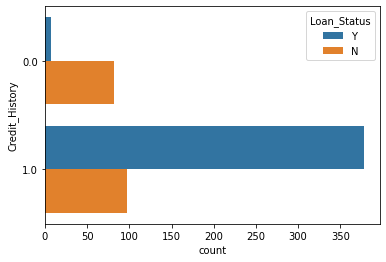

In [ ]:
sns.countplot(y='Credit_History', hue="Loan_Status", data=dataset)

According to the credit history, greater number of people pay back their loans.

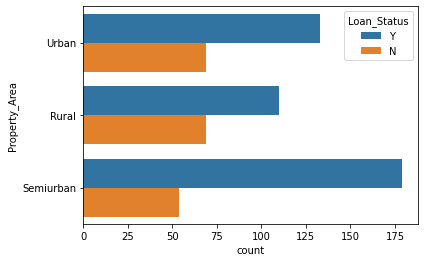

In [ ]:
sns.countplot(y='Property_Area', hue="Loan_Status", data=dataset)

Semiurban obtain more loan, folowed by Urban and then rural.

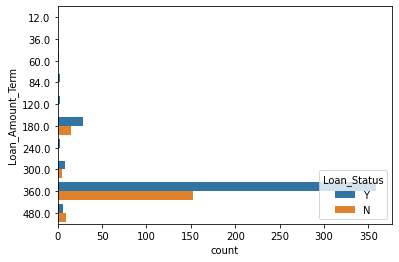

In [ ]:
sns.countplot(y='Loan_Amount_Term', hue="Loan_Status", data=dataset)

An extremely high number of them go for a 360 cyclic loan term. That’s pay back within a year

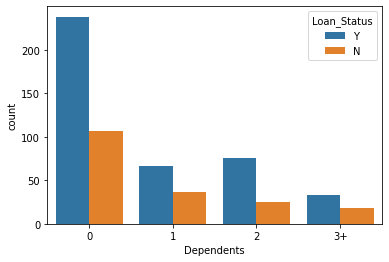

In [ ]:
sns.countplot(dataset['Dependents'],hue="Loan_Status",data=dataset)

Customers with no dependents obtain loan easily

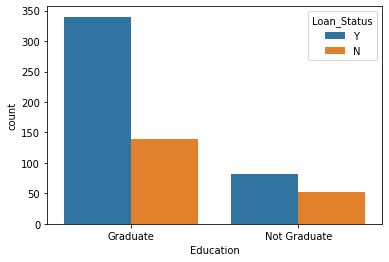

In [ ]:
sns.countplot(dataset['Education'],hue="Loan_Status",data=dataset)

Graduates obtain loan easily compared to Non-graduates

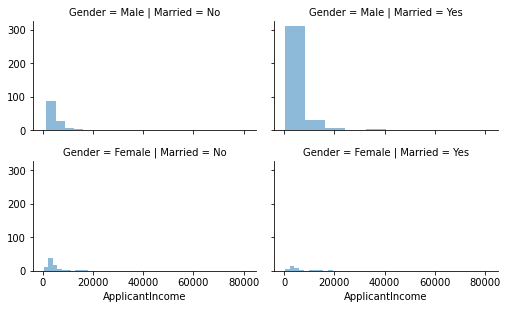

In [ ]:
grid=sns.FacetGrid(dataset,row="Gender",col="Married",size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

Males generally have the highest income. Explicitly, Males that are married have greater income that unmarried male. 

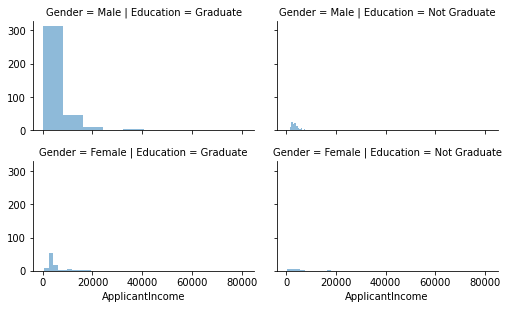

In [ ]:
grid=sns.FacetGrid(dataset,row="Gender",col="Education",size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

A graduate who is a male has more income

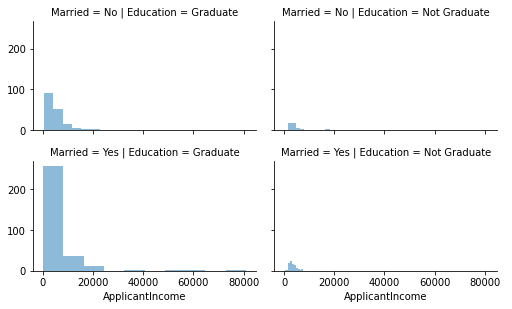

In [ ]:
grid=sns.FacetGrid(dataset,row="Married",col="Education",size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

A graduate and married individual has more income


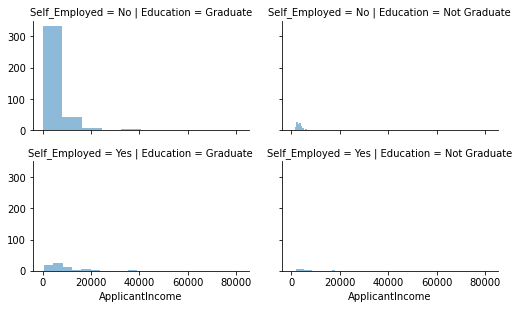

In [ ]:
grid=sns.FacetGrid(dataset,row="Self_Employed",col="Education",size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

A graduate but not self-employed has more income

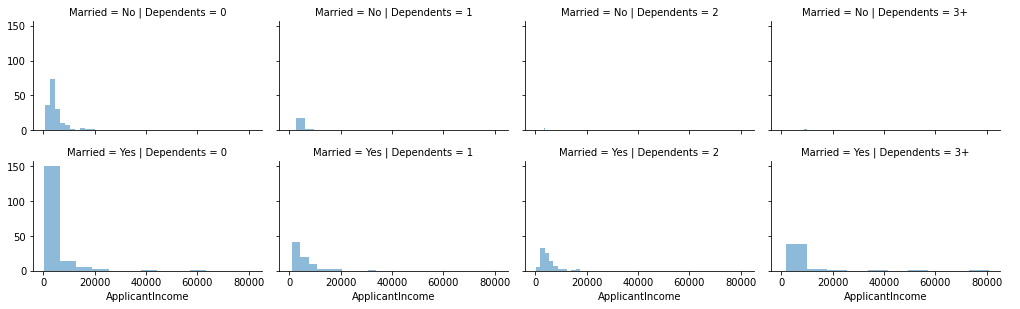

In [ ]:
grid=sns.FacetGrid(dataset,row="Married",col="Dependents",size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

Not married and no dependents have more income. 

Also, Married and no one dependent has greater income with a decreasing effect 
as the number of dependents increase

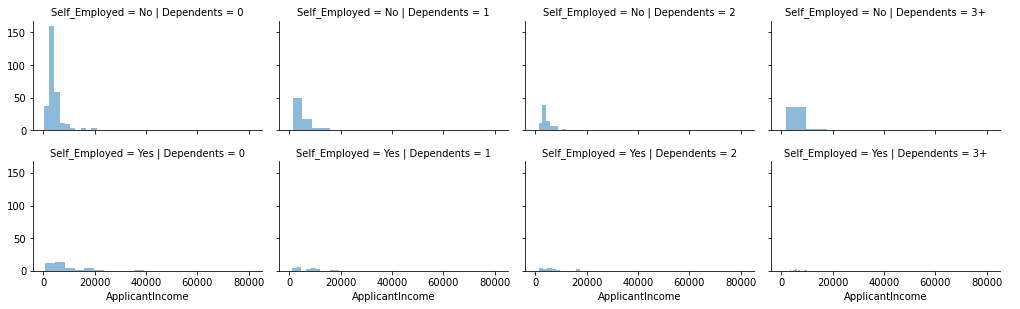

In [ ]:
grid=sns.FacetGrid(dataset,row="Self_Employed",col="Dependents",size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

Self-employed customer who doesn't have dependents has more income

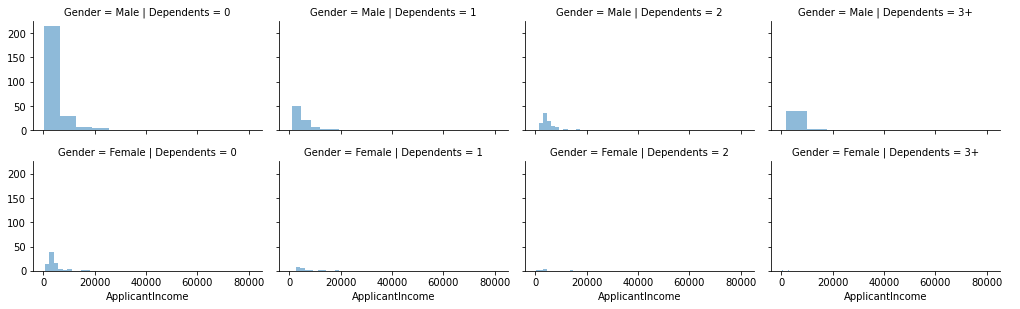

In [ ]:
grid=sns.FacetGrid(dataset,row="Gender",col="Dependents",size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

No one is dependent and a male tremendously has more income

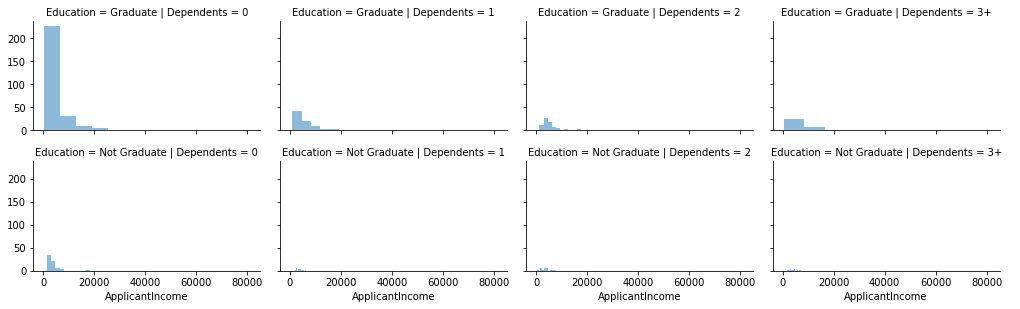

In [ ]:
grid=sns.FacetGrid(dataset,row="Education",col="Dependents",size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

A graduate with no one dependent has more income

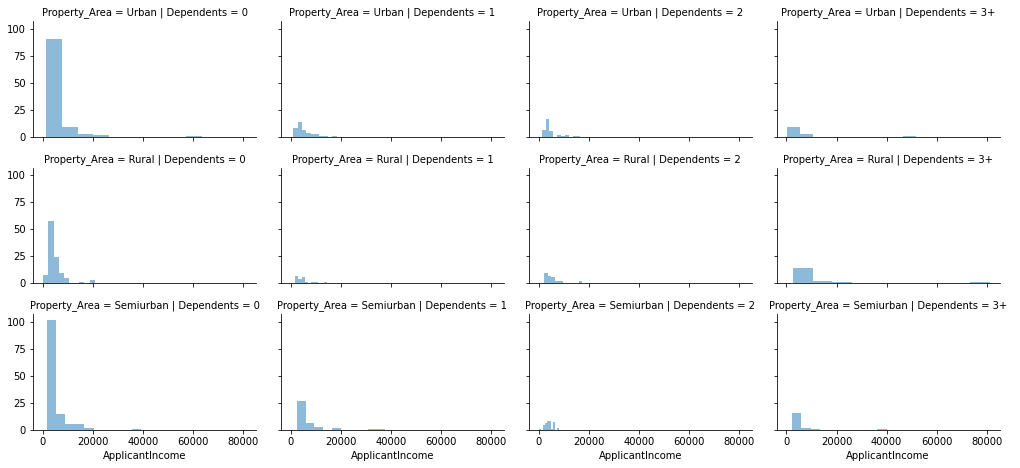

In [ ]:
grid=sns.FacetGrid(dataset,row="Property_Area",col="Dependents",size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

No one is dependent and have property in urban, rural and semiurban has more income

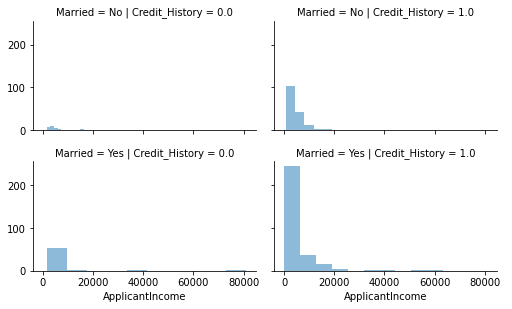

In [ ]:
grid=sns.FacetGrid(dataset,row="Married",col="Credit_History",size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

Married and has a good credit history depicts more income. Also, Not married but has a good credit history follows in the hierarchy.


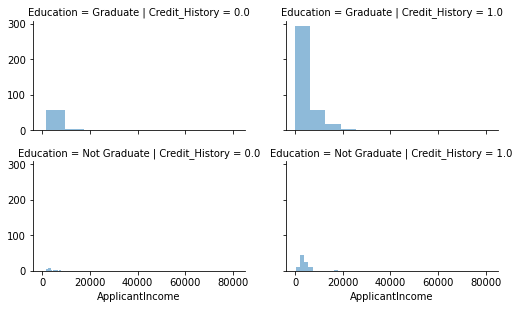

In [ ]:
grid=sns.FacetGrid(dataset,row="Education",col="Credit_History",size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

Educated with good credit history depicts a good income. Also, not a graduate and have a good credit history can be traced to having a better income than a fellow with no degree

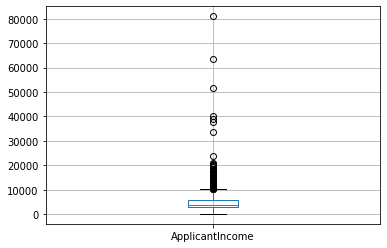

In [ ]:
dataset.boxplot(column="ApplicantIncome")

Outliers present for Applicant Income

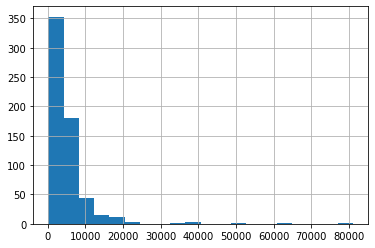

In [ ]:
dataset['ApplicantIncome'].hist(bins=20)

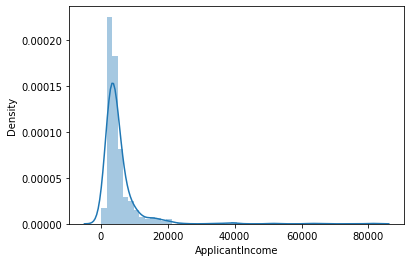

In [ ]:
sns.distplot(dataset["ApplicantIncome"])

We can see that the graph is left-skewed. Therefore, we need to normalise it for better results

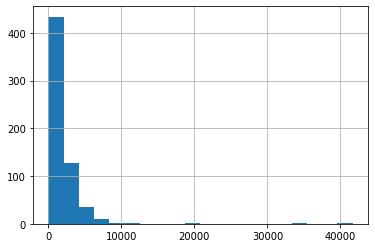

In [ ]:
dataset['CoapplicantIncome'].hist(bins=20)

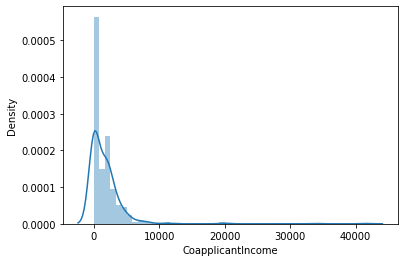

In [ ]:
sns.distplot(dataset["CoapplicantIncome"])

The graph is skewed for Co-applicant Income

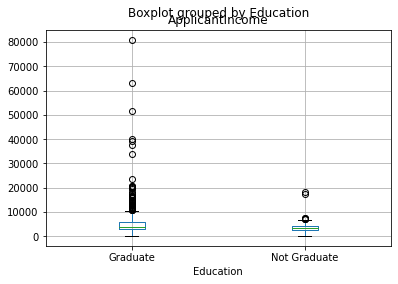

In [ ]:
dataset.boxplot(column='ApplicantIncome',by='Education')

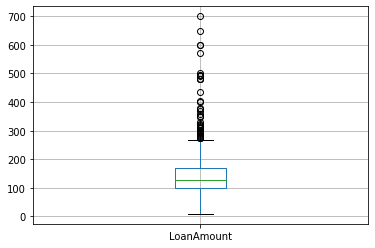

In [ ]:
dataset.boxplot(column='LoanAmount')

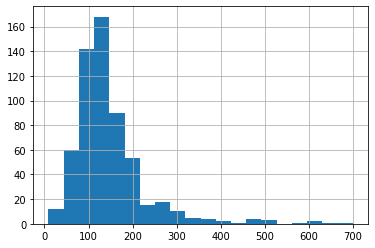

In [ ]:
dataset['LoanAmount'].hist(bins=20)

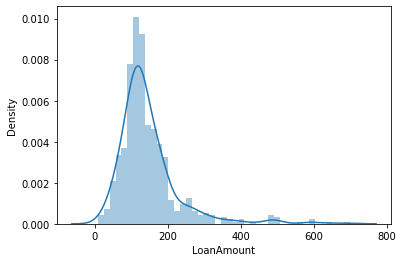

In [ ]:
sns.distplot(dataset["LoanAmount"])

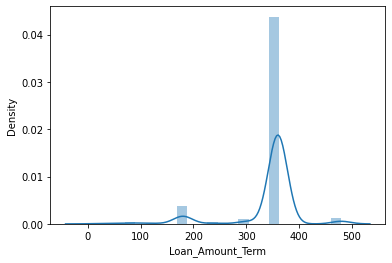

In [ ]:
sns.distplot(dataset['Loan_Amount_Term'])

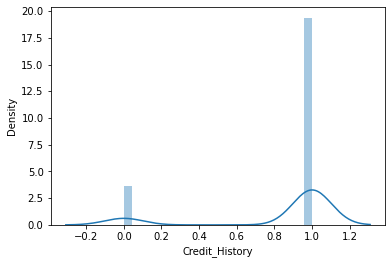

In [ ]:
sns.distplot(dataset['Credit_History'])

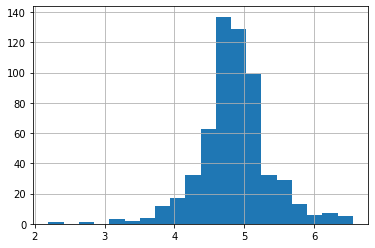

In [ ]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

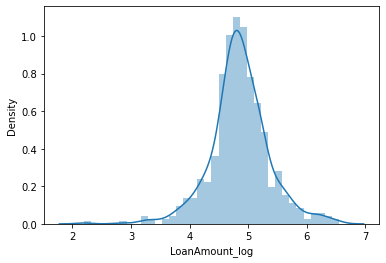

In [ ]:
sns.distplot(dataset['LoanAmount_log'])

Normalising Loan Amount of the dataset

**Pre-Processing of Dataset**

Check where there are missing values and fix them appropriately

In [ ]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

Fill Missing Values

In [ ]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [ ]:
dataset.LoanAmount=dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log=dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

In [ ]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

**Creation of new attributes and their Log Transformation**

In [ ]:
dataset['TotalIncome']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
dataset['TotalIncome_log']=np.log(dataset['TotalIncome'])

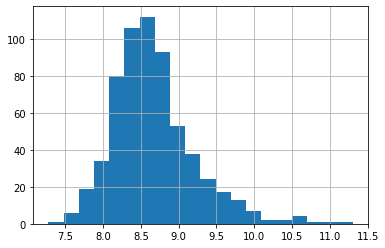

In [ ]:
dataset['TotalIncome_log'].hist(bins=20)

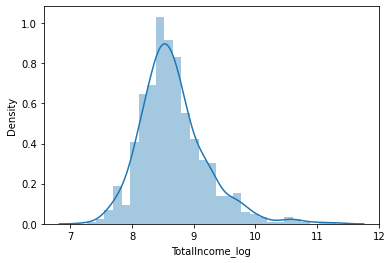

In [ ]:
sns.distplot(dataset['TotalIncome_log'])

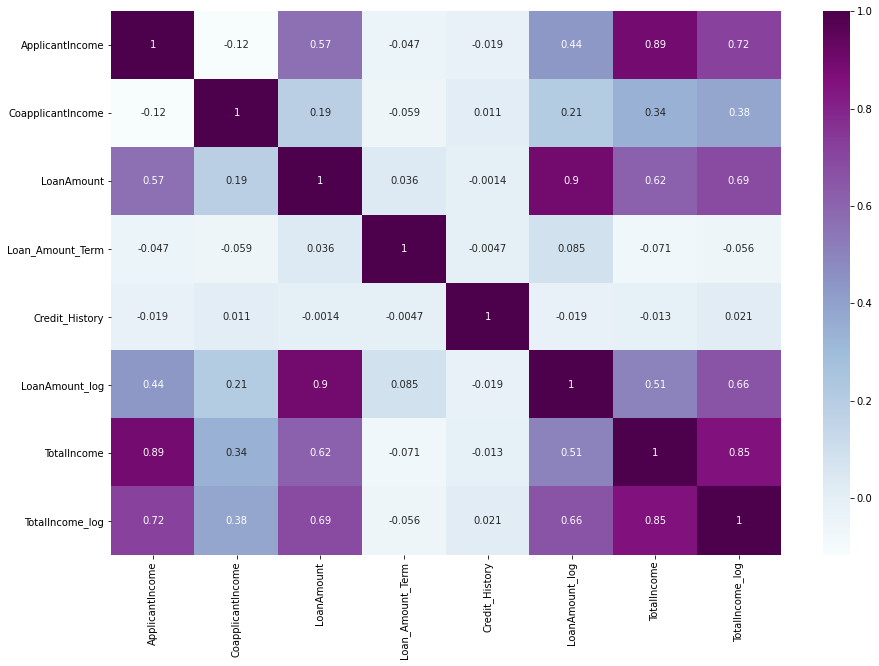

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

Heatmap: Showing the correlations of features with the target. No correlations are extremely high. The correlations between LoanAmount and ApplicantIncome can be explained.

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [ ]:
#x denotes independent variables
X=dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
Y=dataset.iloc[:,12].values

In [ ]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [ ]:
Y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [ ]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


Label Encoder

In [ ]:
#Lable encoder to convert categorical text to numerical format
from sklearn.preprocessing import LabelEncoder
labelEncoder_X=LabelEncoder()

In [ ]:
for i in range(0,5):
  X_train[:,i]=labelEncoder_X.fit_transform(X_train[:,i])

In [ ]:
 X_train[:,7]=labelEncoder_X.fit_transform(X_train[:,7])

In [ ]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [ ]:
labelEncoder_Y=LabelEncoder()
Y_train= Y_train[:]=labelEncoder_Y.fit_transform(Y_train)

In [ ]:
Y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
for i in range(0,5):
  X_test[:,i]=labelEncoder_X.fit_transform(X_test[:,i])

In [ ]:
X_test[:,7]=labelEncoder_X.fit_transform(X_test[:,7])

In [ ]:
X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [ ]:
Y_test= Y_test[:]=labelEncoder_Y.fit_transform(Y_test)

In [ ]:
Y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
#Scale data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

**Training Models**

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=  DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=7)
DTClassifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred=DTClassifier.predict(X_test)

In [ ]:
from sklearn import metrics
print('The accuracy of decision tree is:',metrics.accuracy_score(y_pred,Y_test))

The accuracy of decision tree is: 0.7804878048780488


In [ ]:
feature=dataset.drop(columns='Loan_Status')
target=dataset['Loan_Status']

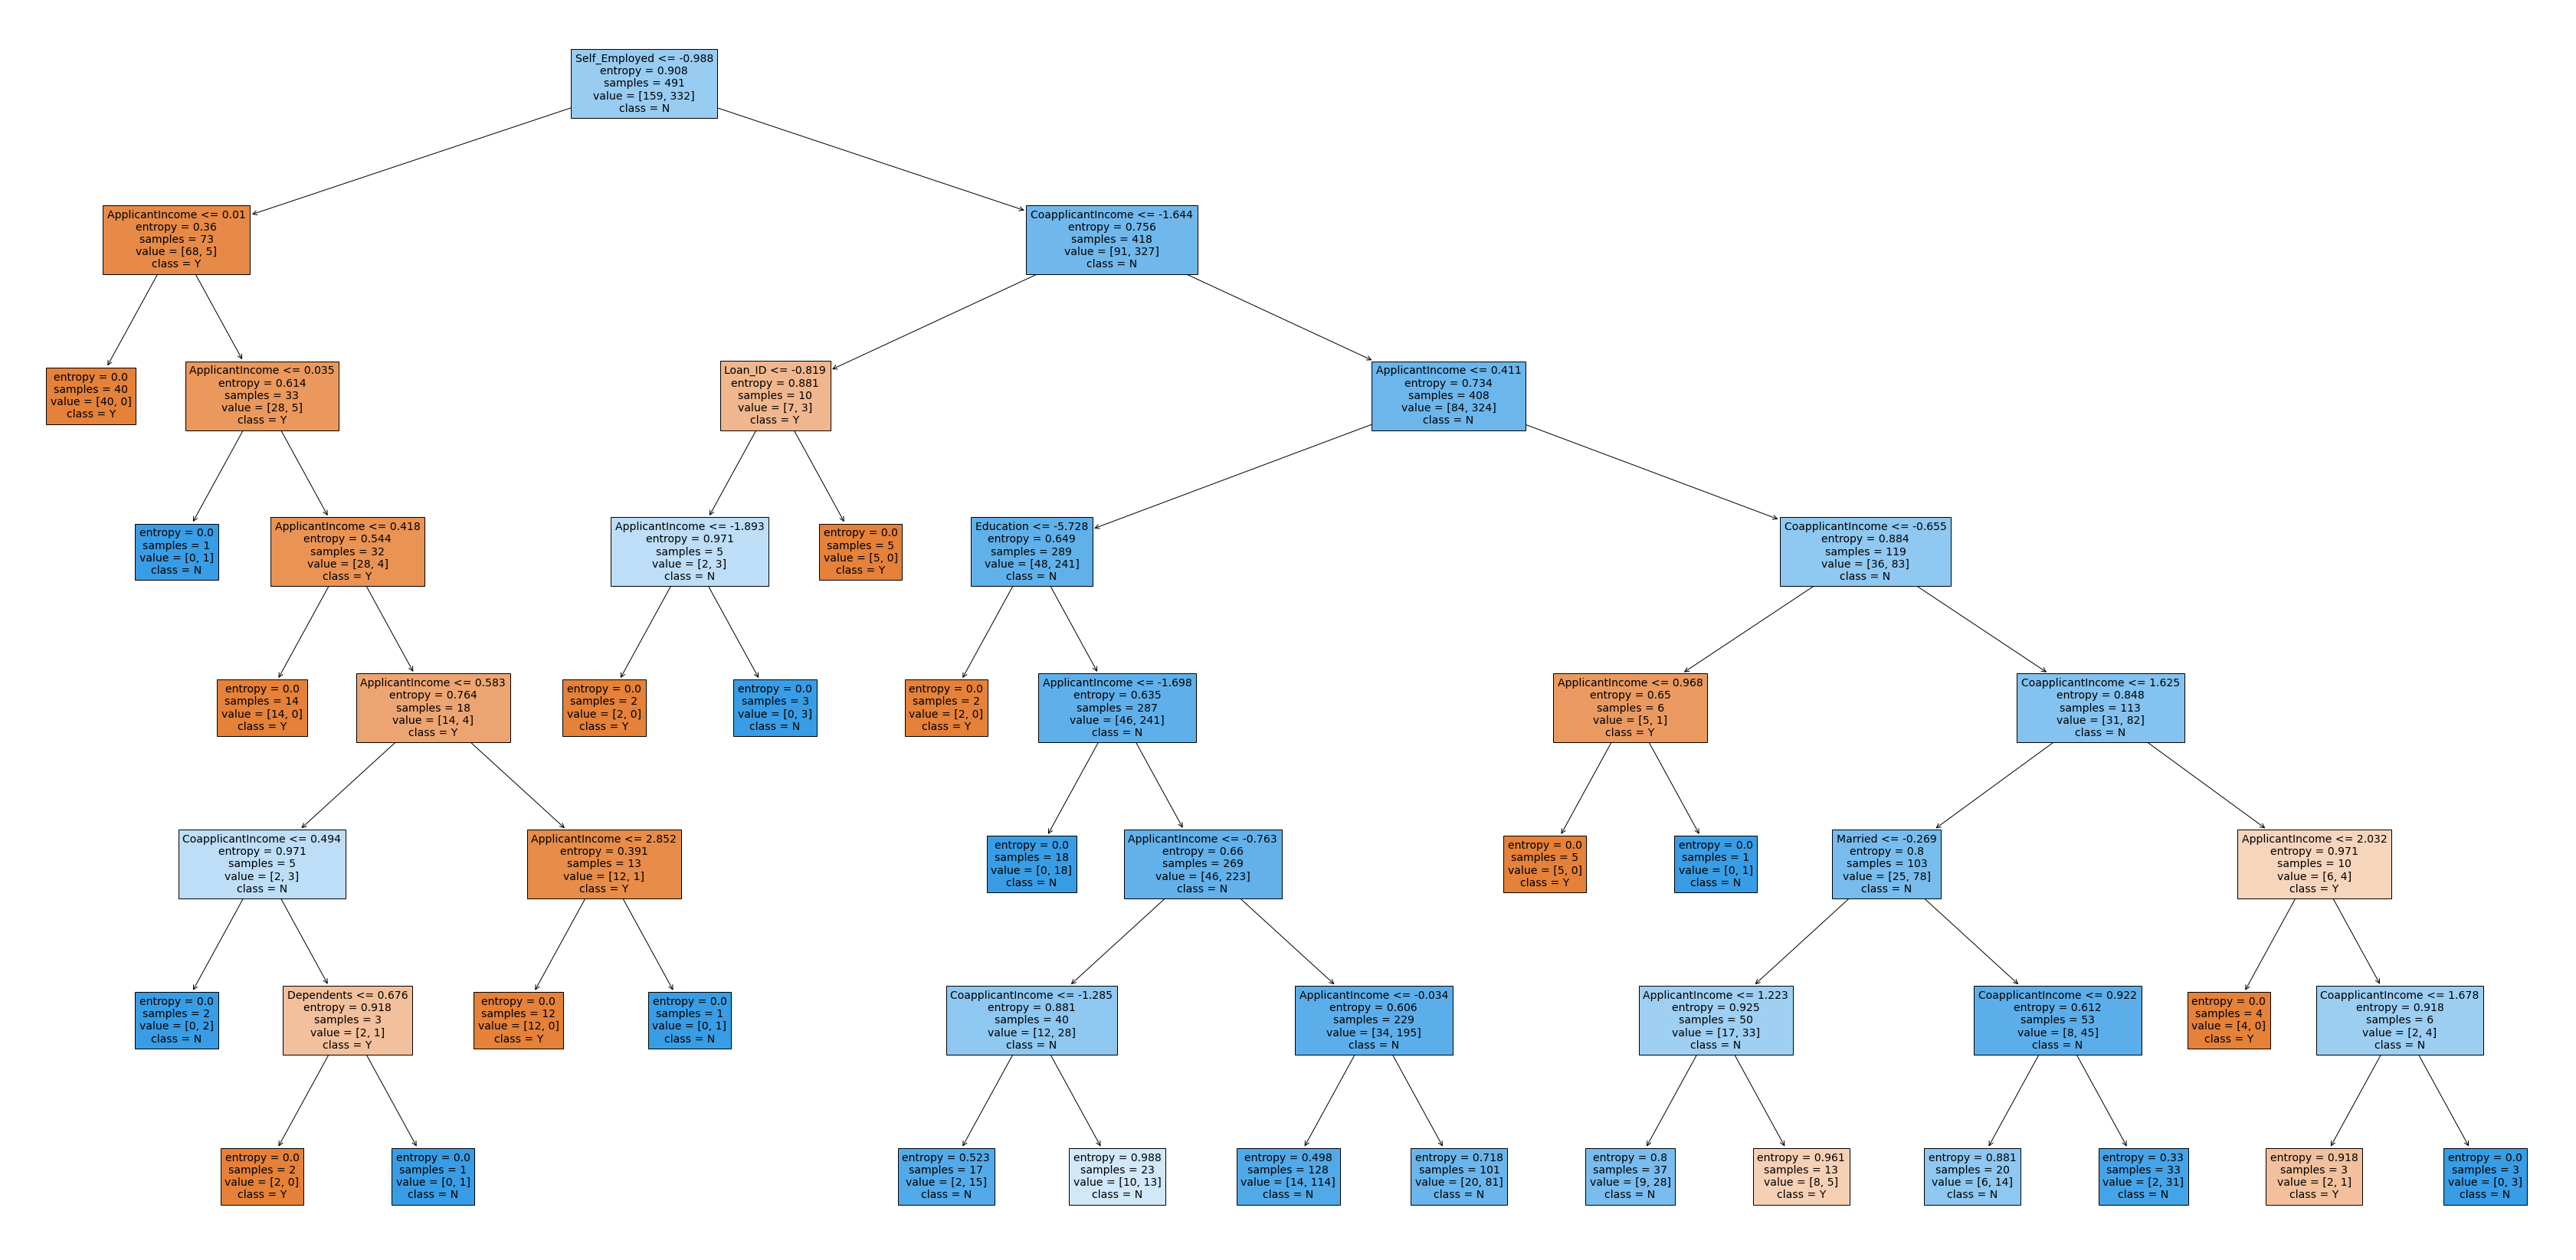

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(60,30))
out = tree.plot_tree(DTClassifier, 
                   feature_names=feature.columns.tolist(),
                   class_names=target.tolist(),
                   filled=True
                   )

In [ ]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(DTClassifier, out_file=None, 
                                feature_names=feature.columns.tolist() 
#Draw graph
graph= graphviz.Source(dot_data)
graph

SyntaxError: ignored

Support vector Machine

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# accuracy score on training data
from sklearn.metrics import accuracy_score
y_pred= classifier.predict(X_test)
testing_data_accuray = accuracy_score(y_pred,Y_test)
print('Accuracy on testing data : ', testing_data_accuray)

Accuracy on testing data :  0.8292682926829268


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred= model.predict(X_test)
testing_data_accuray = accuracy_score(y_pred,Y_test)
print('Accuracy on testing data : ', testing_data_accuray)

Accuracy on testing data :  0.8130081300813008


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
ypred_forest=forest.predict(X_test)
print(ypred_forest)

[1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 0 0 1]


In [ ]:
forest_data_accuray = accuracy_score(ypred_forest,Y_test)
print('Accuracy on testing data : ', testing_data_accuray)

Accuracy on testing data :  0.8130081300813008


In [ ]:
evaluation_forest=f1_score(Y_test, ypred_forest)
evaluation_forest


0.8556149732620321

Hyper parameter Tuning

In [ ]:
hypermodel = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
hypermodel.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred= hypermodel.predict(X_test)
testing_data_accuray = accuracy_score(y_pred,Y_test)
print(y_pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [ ]:
print('The accuracy of Hyper parameter tuning is:',metrics.accuracy_score(y_pred,Y_test))

The accuracy of Hyper parameter tuning is: 0.8292682926829268


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred=NBClassifier.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
print('The accuracy of Naive Bayes is:',metrics.accuracy_score(y_pred,Y_test))

The accuracy of Naive Bayes is: 0.8292682926829268


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[14, 19],
       [ 4, 86]])

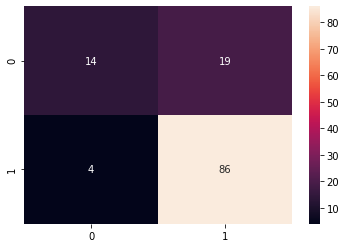

In [ ]:
sns.heatmap(cm, annot=True)

Prediction Dataset

In [ ]:
testData=pd.read_csv("/content/drive/MyDrive/Data Mining Project/test.csv")

In [ ]:
testData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
testData.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
testData['Gender'].fillna(testData['Gender'].mode()[0],inplace=True)
testData['Dependents'].fillna(testData['Dependents'].mode()[0],inplace=True)
testData['Self_Employed'].fillna(testData['Self_Employed'].mode()[0],inplace=True)
testData['Loan_Amount_Term'].fillna(testData['Loan_Amount_Term'].mode()[0],inplace=True)
testData['Credit_History'].fillna(testData['Credit_History'].mode()[0],inplace=True)

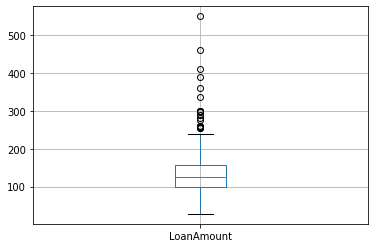

In [ ]:
testData.boxplot(column="LoanAmount")

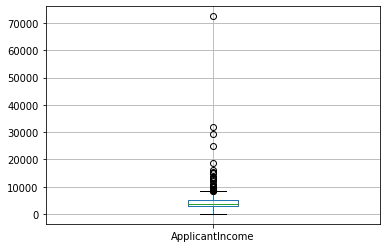

In [ ]:
testData.boxplot(column="ApplicantIncome")

In [ ]:
testData['LoanAmount'].fillna(testData['LoanAmount'].mode()[0],inplace=True)

In [ ]:
testData['LoanAmount_log']=np.log(testData['LoanAmount'])

In [ ]:
testData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [ ]:
testData['TotalIncome']=testData['ApplicantIncome']+testData['CoapplicantIncome']

In [ ]:
testData['TotalIncome_log']=np.log(testData['TotalIncome'])

In [ ]:
testData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [ ]:
test=testData.iloc[:,np.r_[1:5,9:11,13:15]].values

In [ ]:
for i in range(0,5):
  test[:,i]=labelEncoder_X.fit_transform(test[:,i])

In [ ]:
test[:,7]=labelEncoder_X.fit_transform(test[:,7])

In [ ]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [ ]:
test=ss.fit_transform(test)

In [ ]:
pred=NBClassifier.predict(test)

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,